In [1]:
#Import libraries and packages
import pandas as pd
import seaborn as sns
import statsmodels.api as st

In [2]:
#Import data
df = pd.read_csv('SalariesForProfessorsDatabase.csv')
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [3]:
#Create dummy variables
df1 = pd.get_dummies(data=df, dtype=int, drop_first=True)
df1.head()

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1
2,4,3,79750,1,0,1,1
3,45,39,115000,0,1,1,1
4,40,41,141500,0,1,1,1


In [4]:
#Descriptive statistics
df1.describe()

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438,0.168766,0.670025,0.544081,0.901763
std,12.887003,13.006024,30289.038695,0.375017,0.470797,0.498682,0.298010
min,1.000000,0.000000,57800.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,7.000000,91000.000000,0.000000,0.000000,0.000000,1.000000
50%,21.000000,16.000000,107300.000000,0.000000,1.000000,1.000000,1.000000
75%,32.000000,27.000000,134185.000000,0.000000,1.000000,1.000000,1.000000
max,56.000000,60.000000,231545.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

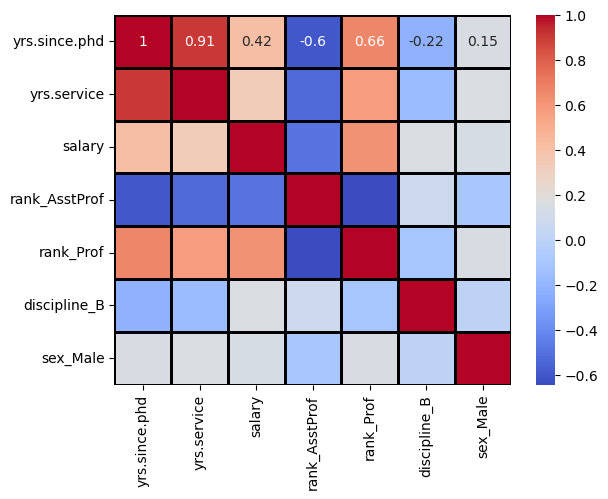

In [5]:
#Data correlation
sns.heatmap(df1.corr(), annot=True, linewidths=1, linecolor= 'black', cmap='coolwarm')

C:\Users\dangt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dangt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dangt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


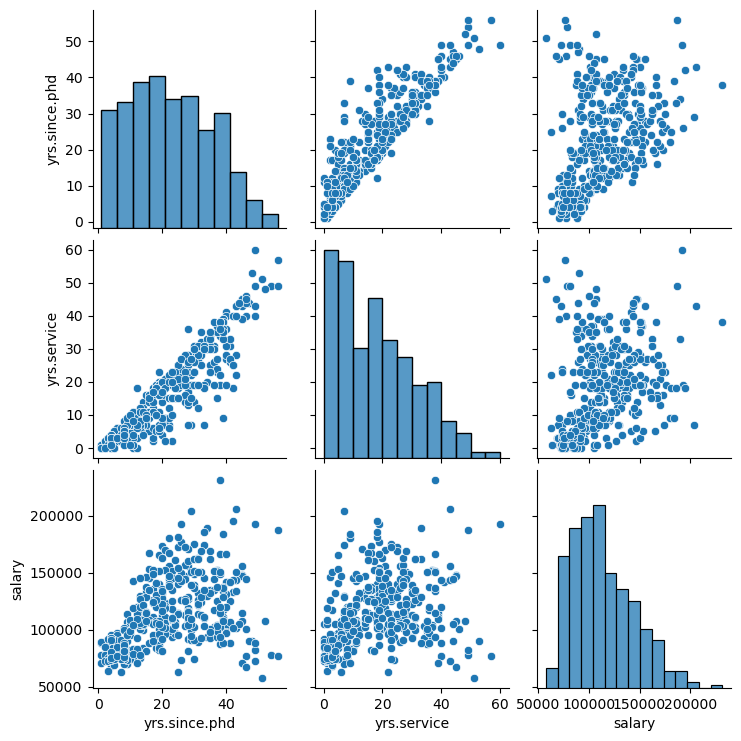

In [6]:
#Data distribution
sns.pairplot(df)

In [7]:
#Linear regression
y = df1['salary']
x = df1.drop(columns='salary')
x = st.add_constant(x)
model = st.OLS(y, exog=x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     54.20
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           1.79e-48
Time:                        21:53:16   Log-Likelihood:                -4538.9
No. Observations:                 397   AIC:                             9092.
Df Residuals:                     390   BIC:                             9120.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.886e+04   4990.326     15.803